Importing Packages and Libraries 

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import datetime as dt
import numpy as np


Load dataset and date input format

In [7]:
# Load dataset
file_path = r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\raw_analyst_ratings\raw_analyst_ratings.csv"
df = pd.read_csv(file_path)

# Ensure datetime format
# Parse various datetime formats robustly
df['date'] = pd.to_datetime(df['date'], errors='coerce')


 Section 1: Descriptive Statistics

# 1. Headline length stats


📊 Overall Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

📊 Average Headline Length by Stock:
stock_name
Facebook    87.413158
Tesla       87.247467
Apple       86.997732
Google      86.687239
Amazon      81.255396
Nvidia      76.813732
Name: headline_length, dtype: float64


C:\Users\mukit\AppData\Local\Temp\ipykernel_780\3780539156.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['stock_name'].notna()], x='stock_name', y='headline_length', palette='pastel')


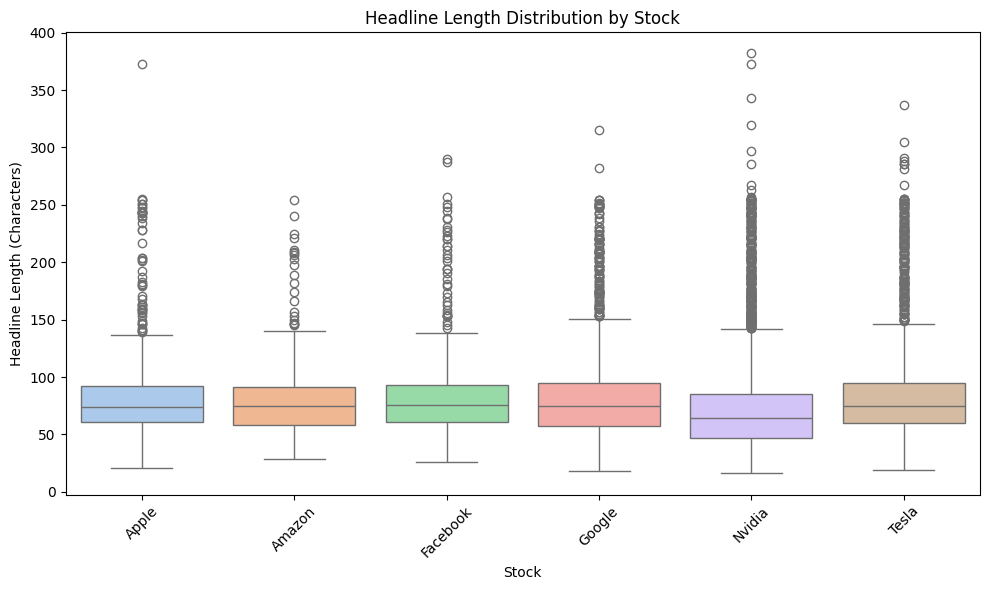

In [10]:


#################
# Calculate headline length
df['headline_length'] = df['headline'].astype(str).apply(len)

# Basic stats
print("\n📊 Overall Headline Length Statistics:")
print(df['headline_length'].describe())

# 🔄 Add stock name mapping (for readability)
stock_names = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'GOOG': 'Google',
    'META': 'Facebook',
    'FB': 'Facebook',
    'MSFT': 'Microsoft',
    'NVDA': 'Nvidia',
    'TSLA': 'Tesla'
}
df['stock_name'] = df['stock'].map(stock_names)

# Show average headline length by stock
print("\n📊 Average Headline Length by Stock:")
print(df.groupby('stock_name')['headline_length'].mean().sort_values(ascending=False))

# Optional: Boxplot to visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['stock_name'].notna()], x='stock_name', y='headline_length', palette='pastel')
plt.title("Headline Length Distribution by Stock")
plt.xlabel("Stock")
plt.ylabel("Headline Length (Characters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 2. Articles per publisher

In [11]:

publisher_counts = df['publisher'].value_counts()
print("\n📰 Articles per Publisher:")
print(publisher_counts.head(10))


📰 Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


# 3. Temporal publication trends

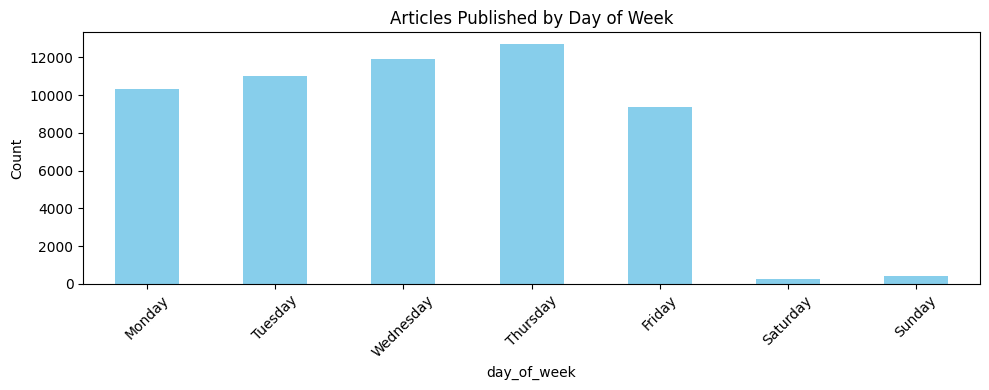

In [12]:

df['day_of_week'] = df['date'].dt.day_name()
df['date_only'] = df['date'].dt.date

plt.figure(figsize=(10, 4))
df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='skyblue')
plt.title('Articles Published by Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Section 2: Text Analysis (Topic Modeling)
# -------------------------------

# Basic keyword extraction using CountVectorizer


🔍 Top Keywords in Headlines:
['00' '10' '52' 'announces' 'bank' 'benzinga' 'buy' 'companies' 'company'
 'coverage' 'day' 'downgrades' 'earnings' 'energy' 'eps' 'est' 'estimate'
 'higher' 'initiates' 'lower' 'lowers' 'maintains' 'market' 'mid' 'moving'
 'neutral' 'new' 'price' 'pt' 'q1' 'q2' 'q3' 'q4' 'raises' 'reports'
 'sales' 'says' 'scheduled' 'sees' 'session' 'share' 'shares' 'stock'
 'stocks' 'target' 'trading' 'update' 'upgrades' 'vs' 'week']


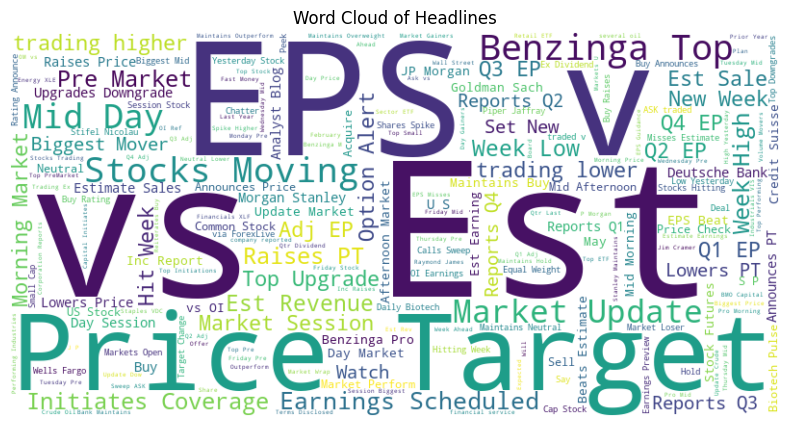

In [14]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['headline'].dropna())
keywords = vectorizer.get_feature_names_out()

print("\n🔍 Top Keywords in Headlines:")
print(keywords)

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['headline'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Headlines")
plt.show()

 Section 3: Time Series Analysis

Frequency Over Time Per Stock

C:\Users\mukit\AppData\Local\Temp\ipykernel_780\2577848008.py:32: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

c:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


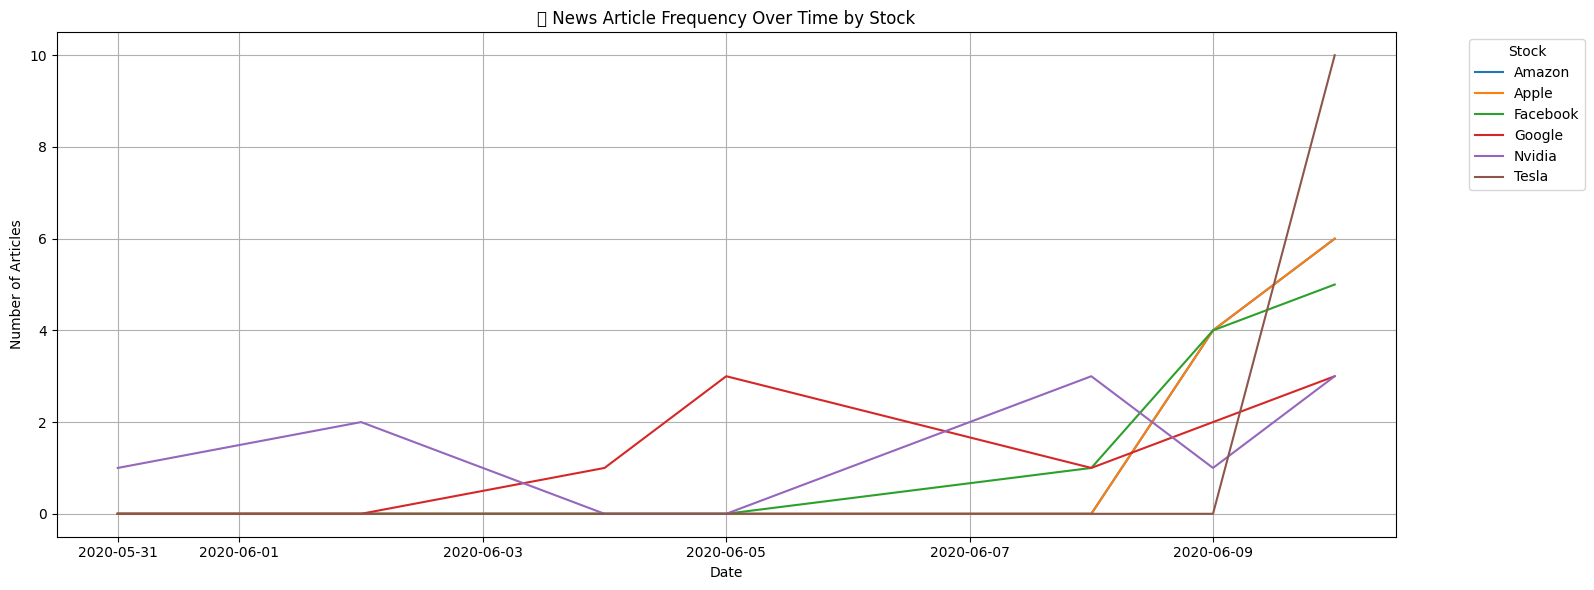

In [18]:
import matplotlib.pyplot as plt

# Ensure date column is parsed and clean
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])  # Drop rows with invalid dates
df['date_only'] = df['date'].dt.date

# Optional: map tickers to company names for clarity
stock_names = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'GOOG': 'Google',
    'META': 'Facebook',
    'FB': 'Facebook',
    'MSFT': 'Microsoft',
    'NVDA': 'Nvidia',
    'TSLA': 'Tesla'
}
df['stock_name'] = df['stock'].map(stock_names)

# Group by date and stock name to count articles
stock_time_series = df.groupby(['date_only', 'stock_name']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(16, 6))
stock_time_series.plot(figsize=(16, 6), linewidth=1.5)
plt.title("🗓️ News Article Frequency Over Time by Stock")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend(title="Stock", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Time of day analysis

C:\Users\mukit\AppData\Local\Temp\ipykernel_780\1038791169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')
C:\Users\mukit\AppData\Local\Temp\ipykernel_780\1038791169.py:7: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


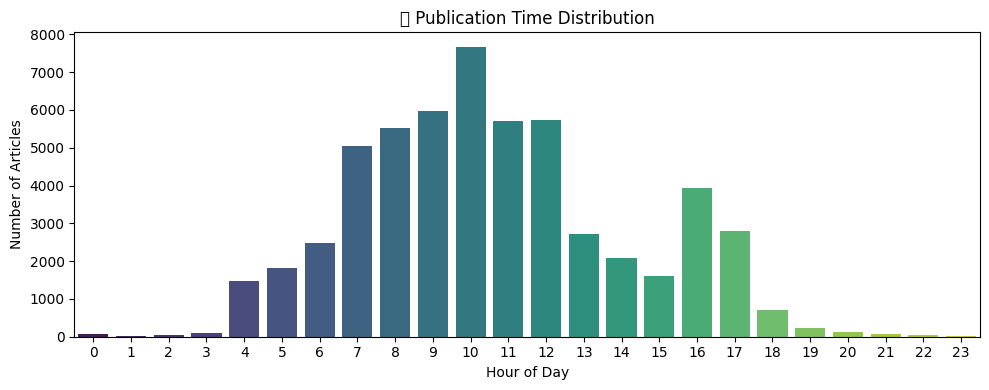

In [19]:
df['hour'] = df['date'].dt.hour
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title("🕒 Publication Time Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

Section 4: Publisher Analysis
# -------------------------------

# Top publishers

In [20]:
top_publishers = df['publisher'].value_counts().head(10)
print("\n🏢 Top Publishers:")
print(top_publishers)


🏢 Top Publishers:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


#Type of content by publisher (based on headline keywords)

In [22]:
publisher_keywords = df.groupby('publisher')['headline'].apply(lambda x: ' '.join(x.dropna())).head(10)
print("\n🧾 Headline Words per Publisher:")
for publisher, text in publisher_keywords.items():
    keywords = CountVectorizer(stop_words='english', max_features=5).fit([text]).get_feature_names_out()
    print(f"{publisher}: {', '.join(keywords)}")


🧾 Headline Words per Publisher:
AARP: businesses, emergency, right, small, ways
Aaron Jackson.Ed: blogosphere, financial, reads, week
Aaron Levitt: bric, catch, g7, goldman, sees
Abe Raymond: 209, 422, america, breaker, circuit
Abhi Rao: game, global, macro
Alex Biles: 10, 2013, emerging, important, technologies
Alex Furno: day, following, gainers, mid, november
Ali Berri: airline, airlines, crash, etfs, following
Ali Hakim: arabia, aren, flocking, investors, newly
Allie Wickman: announces, fund, seven, share, silver


Email domain extraction (if publisher is email)

In [23]:
if df['publisher'].str.contains('@').any():
    df['domain'] = df['publisher'].str.extract(r'@([A-Za-z0-9.-]+)')
    domain_counts = df['domain'].value_counts()
    print("\n📧 Publisher Domains from Emails:")
    print(domain_counts.head())


📧 Publisher Domains from Emails:
domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64


Task 2: Quantitative analysis using pynance and TaLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import talib

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mukit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\mukit\AppData\Local\Temp\ipykernel_19736\705391603.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dates = dates.fillna(new_dates)
C:\Users\mukit\AppData\Local\Temp\ipykernel_19736\705391603.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dates = dates.fillna(new_dates)
C:\Users\mukit\AppData\Local\Temp\ipykernel_19736\705391603.py:25: FutureWarning: Downcasting object d


🔍 Processing TSLA ...
Same-day correlation: r = nan, p = nan
Next-day correlation: r = nan, p = nan


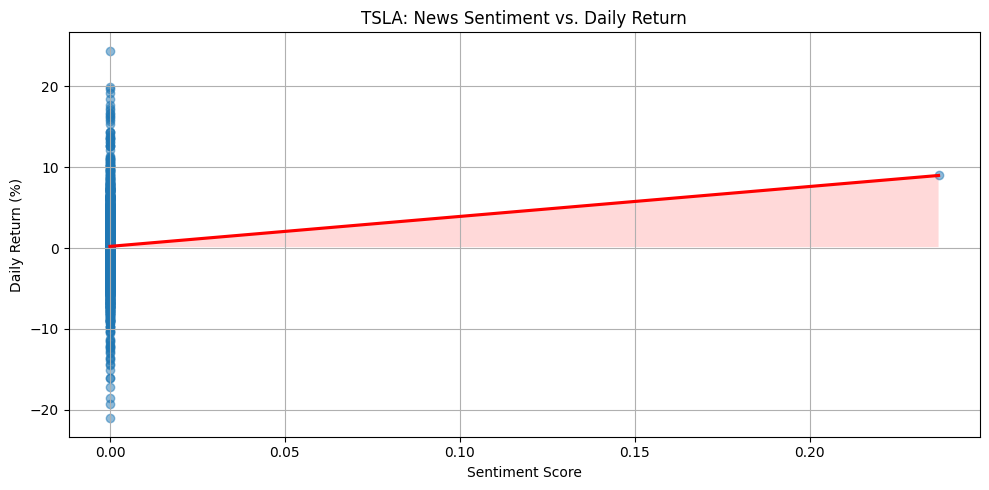


🔍 Processing NVDA ...
Same-day correlation: r = nan, p = nan
Next-day correlation: r = nan, p = nan


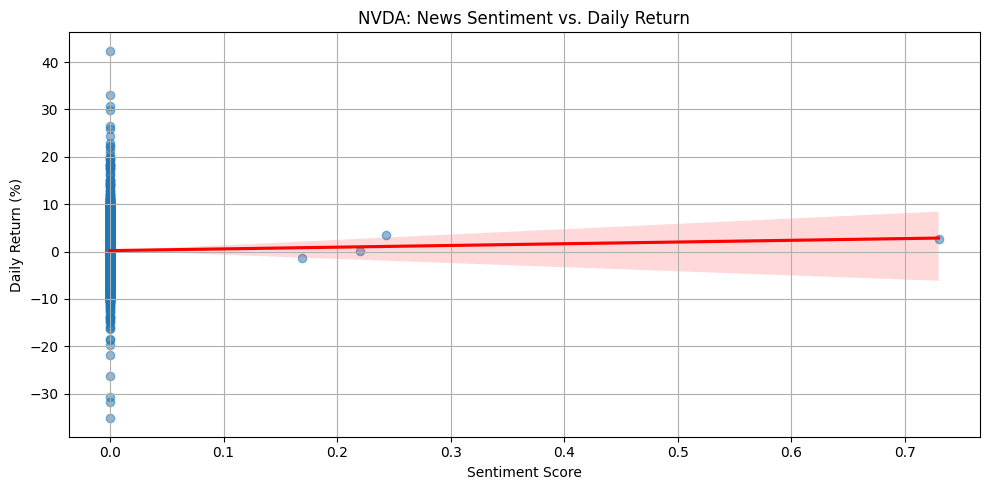


🔍 Processing MSFT ...
Same-day correlation: r = nan, p = nan
Next-day correlation: r = nan, p = nan


C:\Users\mukit\AppData\Local\Temp\ipykernel_19736\705391603.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['sentiment_score'] = merged_df['sentiment_score'].fillna(0)
C:\Users\mukit\AppData\Local\Temp\ipykernel_19736\705391603.py:71: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_same, p_same = pearsonr(merged_df['sentiment_score'], merged_df['daily_return_pct'])
C:\Users\mukit\AppData\Local\Temp\ipykernel_19736\705391603.py:72: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_next, p_next = pearsonr(merged_df['sentiment_score'], merged_df['next_day_return'])


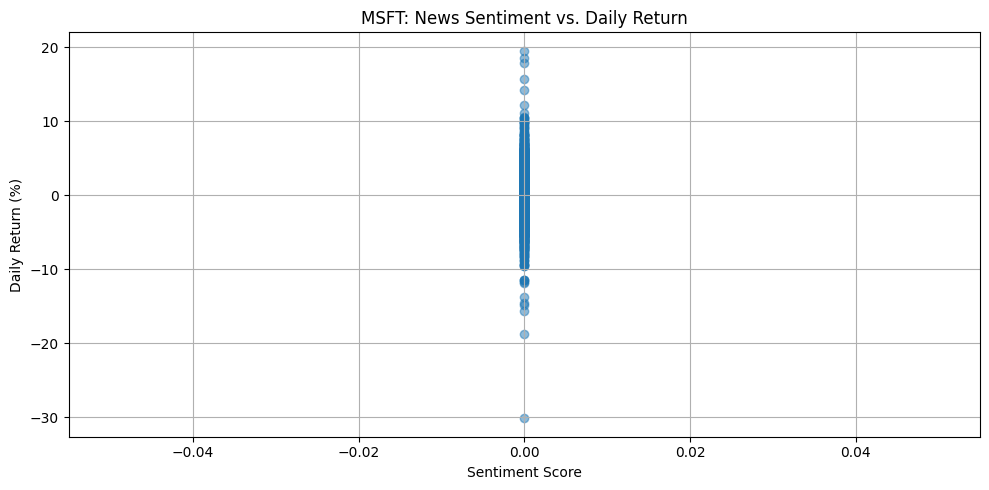


🔍 Processing META ...
Same-day correlation: r = nan, p = nan
Next-day correlation: r = nan, p = nan


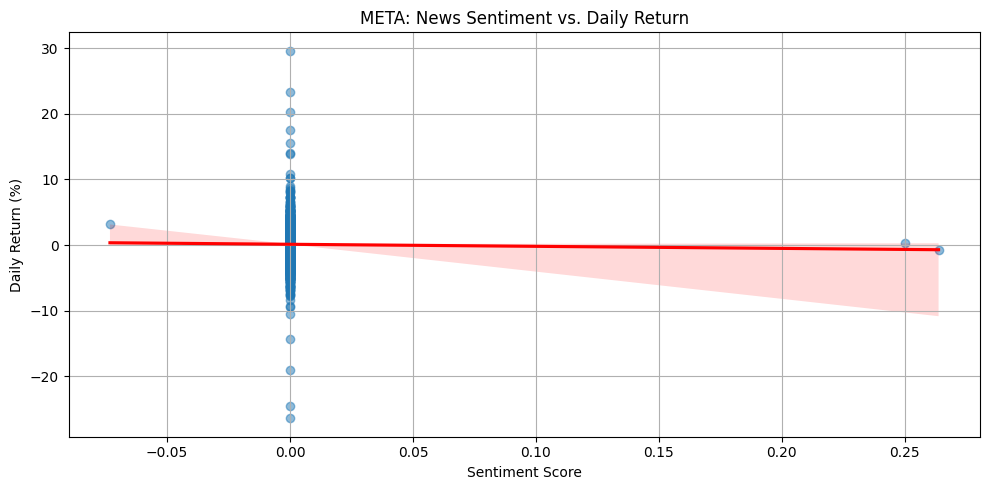


🔍 Processing GOOG ...
Same-day correlation: r = nan, p = nan
Next-day correlation: r = nan, p = nan


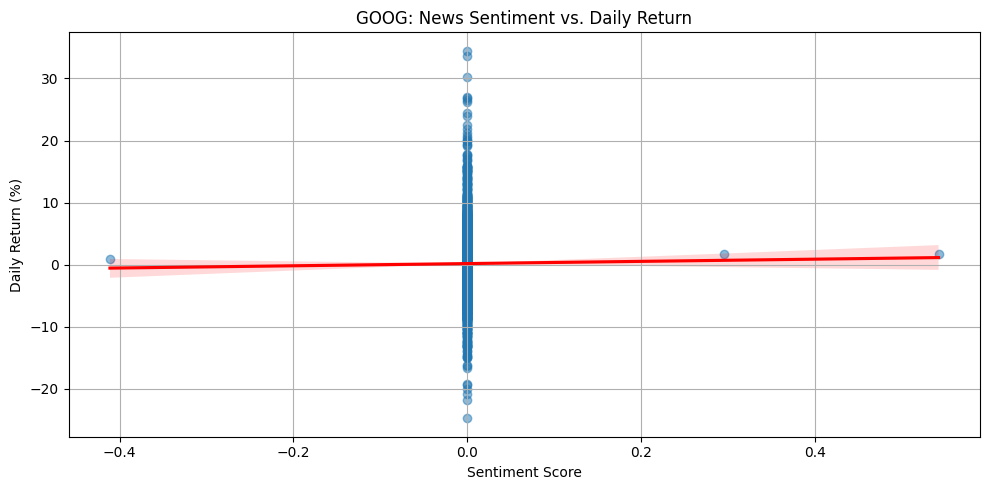

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime, date
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download VADER lexicon
nltk.download('vader_lexicon')

# =============================
# 1. Helper Functions
# =============================

def safe_date_parse(date_series):
    """Try parsing dates with fallback formats."""
    dates = pd.to_datetime(date_series, errors='coerce')
    if dates.isna().any():
        for fmt in ['%m/%d/%Y', '%d-%m-%Y', '%Y%m%d', '%b %d %Y', '%d %b %Y']:
            try:
                new_dates = pd.to_datetime(date_series, format=fmt, errors='coerce')
                dates = dates.fillna(new_dates)
            except:
                continue
    return dates

def get_sentiment(text, sid):
    """Compute compound sentiment score using VADER."""
    if pd.isna(text):
        return 0
    return sid.polarity_scores(str(text))['compound']

def process_stock(symbol, file_path, news_df, sid):
    print(f"\n🔍 Processing {symbol} ...")

    # =============================
    # Filter News for Stock
    # =============================
    stock_news = news_df[news_df['stock'].str.upper().isin([symbol, alias_map.get(symbol, '')])].copy()
    stock_news['sentiment_score'] = stock_news['headline'].apply(lambda x: get_sentiment(x, sid))
    stock_news['date_only'] = stock_news['date'].dt.date

    # =============================
    # Load Stock Price
    # =============================
    df_stock = pd.read_csv(file_path)
    df_stock = df_stock.rename(columns={'Date': 'date', 'Close': 'close'})
    df_stock['date'] = safe_date_parse(df_stock['date'])
    df_stock = df_stock.dropna(subset=['date']).sort_values('date')
    df_stock['daily_return_pct'] = df_stock['close'].pct_change() * 100
    df_stock['date_only'] = df_stock['date'].dt.date

    # =============================
    # Merge & Analyze
    # =============================
    merged_df = pd.merge(
        df_stock,
        stock_news.groupby('date_only')['sentiment_score'].mean().reset_index(),
        on='date_only',
        how='left'
    )
    merged_df['sentiment_score'] = merged_df['sentiment_score'].fillna(0)
    merged_df['next_day_return'] = merged_df['daily_return_pct'].shift(-1)

    # =============================
    # Correlation Analysis
    # =============================
    r_same, p_same = pearsonr(merged_df['sentiment_score'], merged_df['daily_return_pct'])
    r_next, p_next = pearsonr(merged_df['sentiment_score'], merged_df['next_day_return'])

    print(f"Same-day correlation: r = {r_same:.3f}, p = {p_same:.4f}")
    print(f"Next-day correlation: r = {r_next:.3f}, p = {p_next:.4f}")

    # =============================
    # Visualization
    # =============================
    plt.figure(figsize=(10, 5))
    sns.regplot(data=merged_df, x='sentiment_score', y='daily_return_pct',
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f"{symbol}: News Sentiment vs. Daily Return")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Daily Return (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# =============================
# 2. Load and Clean News Data
# =============================
news_path = r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\raw_analyst_ratings\raw_analyst_ratings.csv"
news_df = pd.read_csv(news_path)
news_df.columns = [col.lower() for col in news_df.columns]
news_df['date'] = safe_date_parse(news_df['date'])
news_df = news_df.dropna(subset=['date'])
news_df['date'] = pd.to_datetime(news_df['date'])
if news_df['date'].dt.tz is None:
    news_df['date'] = news_df['date'].dt.tz_localize('America/New_York')

# =============================
# 3. Define Stock Paths
# =============================
stock_paths = {
    'TSLA': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\TSLA_historical_data.csv",
    'NVDA': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\NVDA_historical_data.csv",
    'MSFT': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\MSFT_historical_data.csv",
    'META': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\META_historical_data.csv",
    'GOOG': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\AMZN_historical_data.csv"
}

# Handle alternate ticker symbols (e.g., FB for META)
alias_map = {
    'META': 'FB'
}

# =============================
# 4. Initialize Sentiment Model
# =============================
sid = SentimentIntensityAnalyzer()

# =============================
# 5. Process Each Stock
# =============================
for symbol, path in stock_paths.items():
    process_stock(symbol, path, news_df, sid)
